#  PARKINSONS DATA ANALYSIS AND PREDICTIVE DIAGNOSIS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Set pandas display precision for floats
pd.set_option('display.precision', 4)  # Set to 4 decimal places

## 1. Project Background

###  Objectives:  
-  Analyze the parksinsons data set to understand the distribution and relationships between feature variables and a target variable.
-  The target variable in this dataset is a diagnosis indicator of whether a patient was diagnosed with parkinsons.
-  Develop models and compare the performance of them to determine the most accurate and appropriate models.

#### Dataset source:  https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data
##### Data Contents:
<p>This dataset comprises comprehensive health information for 2,105 patients diagnosed with Parkinson's Disease, each uniquely identified with IDs ranging from 3058 to 5162. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Parkinson's Disease, develop predictive models, and conduct statistical analyses. </p>
<p>The dataset includes additional data in the following categories.</p> 

-  Patient Information
-  Patient ID
-  Demographic Details
-  Lifestyle Factors
-  Medical History
-  Clinical Measurements
-  Cognitive and Functional Assessments
-  Symptoms
-  Diagnosis Information
-  Confidential Information
 Information



## 2.  Data Input

In [3]:
filepath = '../data/raw/parkinsons_disease_data.csv'
df = pd.read_csv(filepath)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,...,1.5724,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,...,4.7876,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,...,2.1307,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,...,3.3913,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,...,3.2010,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

## 3. Data Cleaning

In [6]:
#  No null values
print('Columns with count of NaN values:')
df.isna().sum()

Columns with count of NaN values:


PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [7]:
duplicated_rows = df.duplicated().sum()
print('Number of duplicate rows:', duplicated_rows )

Number of duplicate rows: 0


## 4. Exploratory Data Analysis

In [8]:
#  What is the distribution of the target variable?
df['Diagnosis'].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

In [9]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2.1050e+03,...,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000
mean,4110.0000,69.6019,0.4926,0.6926,1.3373,27.2095,0.2964,10.0404,5.0167,4.9129e+00,...,15.0943,4.9897,0.4318,0.2527,0.2076,0.1387,0.2950,0.2451,0.2969,0.6195
std,607.8055,11.5945,0.5001,1.0038,0.8958,7.2081,0.4568,5.6870,2.8909,2.8721e+00,...,8.6430,2.9339,0.4954,0.4347,0.4057,0.3457,0.4562,0.4303,0.4570,0.4856
min,3058.0000,50.0000,0.0000,0.0000,0.0000,15.0083,0.0000,0.0022,0.0042,1.0538e-05,...,0.0212,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3584.0000,60.0000,0.0000,0.0000,1.0000,20.7822,0.0000,5.1503,2.4557,2.4785e+00,...,7.5172,2.4159,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,4110.0000,70.0000,0.0000,0.0000,1.0000,27.1846,0.0000,10.0703,5.0316,4.8252e+00,...,14.9636,4.9832,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,4636.0000,80.0000,1.0000,1.0000,2.0000,33.4625,1.0000,14.8296,7.5128,7.3815e+00,...,22.6084,7.4842,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000
max,5162.0000,89.0000,1.0000,3.0000,3.0000,39.9999,1.0000,19.9889,9.9953,9.9959e+00,...,29.9701,9.9927,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
df.describe(include='object')

,DoctorInCharge
count,2105
unique,1
top,DrXXXConfid
freq,2105


In [11]:
columns = list(df.columns[1:34])
df[columns]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,9.2832,...,29.1813,1.5724,1,0,0,0,0,0,0,0
1,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,5.6025,...,12.3326,4.7876,0,1,0,1,0,1,0,1
2,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,9.9298,...,29.9278,2.1307,1,0,0,0,1,0,1,1
3,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,4.1962,...,21.3043,3.3913,1,1,1,0,0,0,1,1
4,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,9.3639,...,8.3364,3.2010,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,0,2,38.4838,0,12.6744,5.3259,5.9473,6.2962,...,28.6340,8.0763,1,0,0,0,1,1,0,0
2101,67,0,0,1,33.6944,1,0.9770,0.1086,4.8252,6.3423,...,13.1065,1.6658,0,0,0,1,0,1,1,1
2102,65,0,0,2,22.8296,0,6.1523,5.7751,0.3342,9.7400,...,26.5277,4.7856,0,0,0,0,1,1,0,1
2103,61,1,0,0,16.8710,1,0.2921,2.2805,9.5985,8.2894,...,19.8734,8.3790,1,0,1,0,0,1,1,1


In [12]:
#  Create dataframes with categorical data and with continous data
df_categorical = df.loc[:,df.nunique() < 6]
cat_columns = df_categorical.iloc[:, :-1].columns
df_continuous = df.loc[:,df.nunique() >= 6]
cont_columns = df_continuous.columns

In [13]:
df_continuous = df_continuous.assign(Diagnosis=df['Diagnosis'])
df_continuous.head()

,PatientID,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Diagnosis
0,3058,85,19.6199,5.1082,1.3807,3.8940,9.2832,129,60,222.8423,148.1256,37.8678,337.3071,6.4587,29.1813,1.5724,0
1,3059,75,16.2473,6.0276,8.4098,8.5134,5.6025,163,76,210.5011,153.7565,77.2281,264.6355,37.3067,12.3326,4.7876,1
2,3060,70,15.3682,2.2421,0.2133,6.4988,9.9298,113,93,287.3880,118.7026,85.5883,395.6626,67.8382,29.9278,2.1307,1
3,3061,52,15.4546,5.9978,1.3750,6.7150,4.1962,146,78,280.3395,136.2992,51.8696,362.1897,52.9647,21.3043,3.3913,1
4,3062,87,18.6160,9.7752,1.1886,4.6576,9.3639,115,94,284.0142,108.4495,25.0694,149.9566,21.8049,8.3364,3.2010,0


6 3


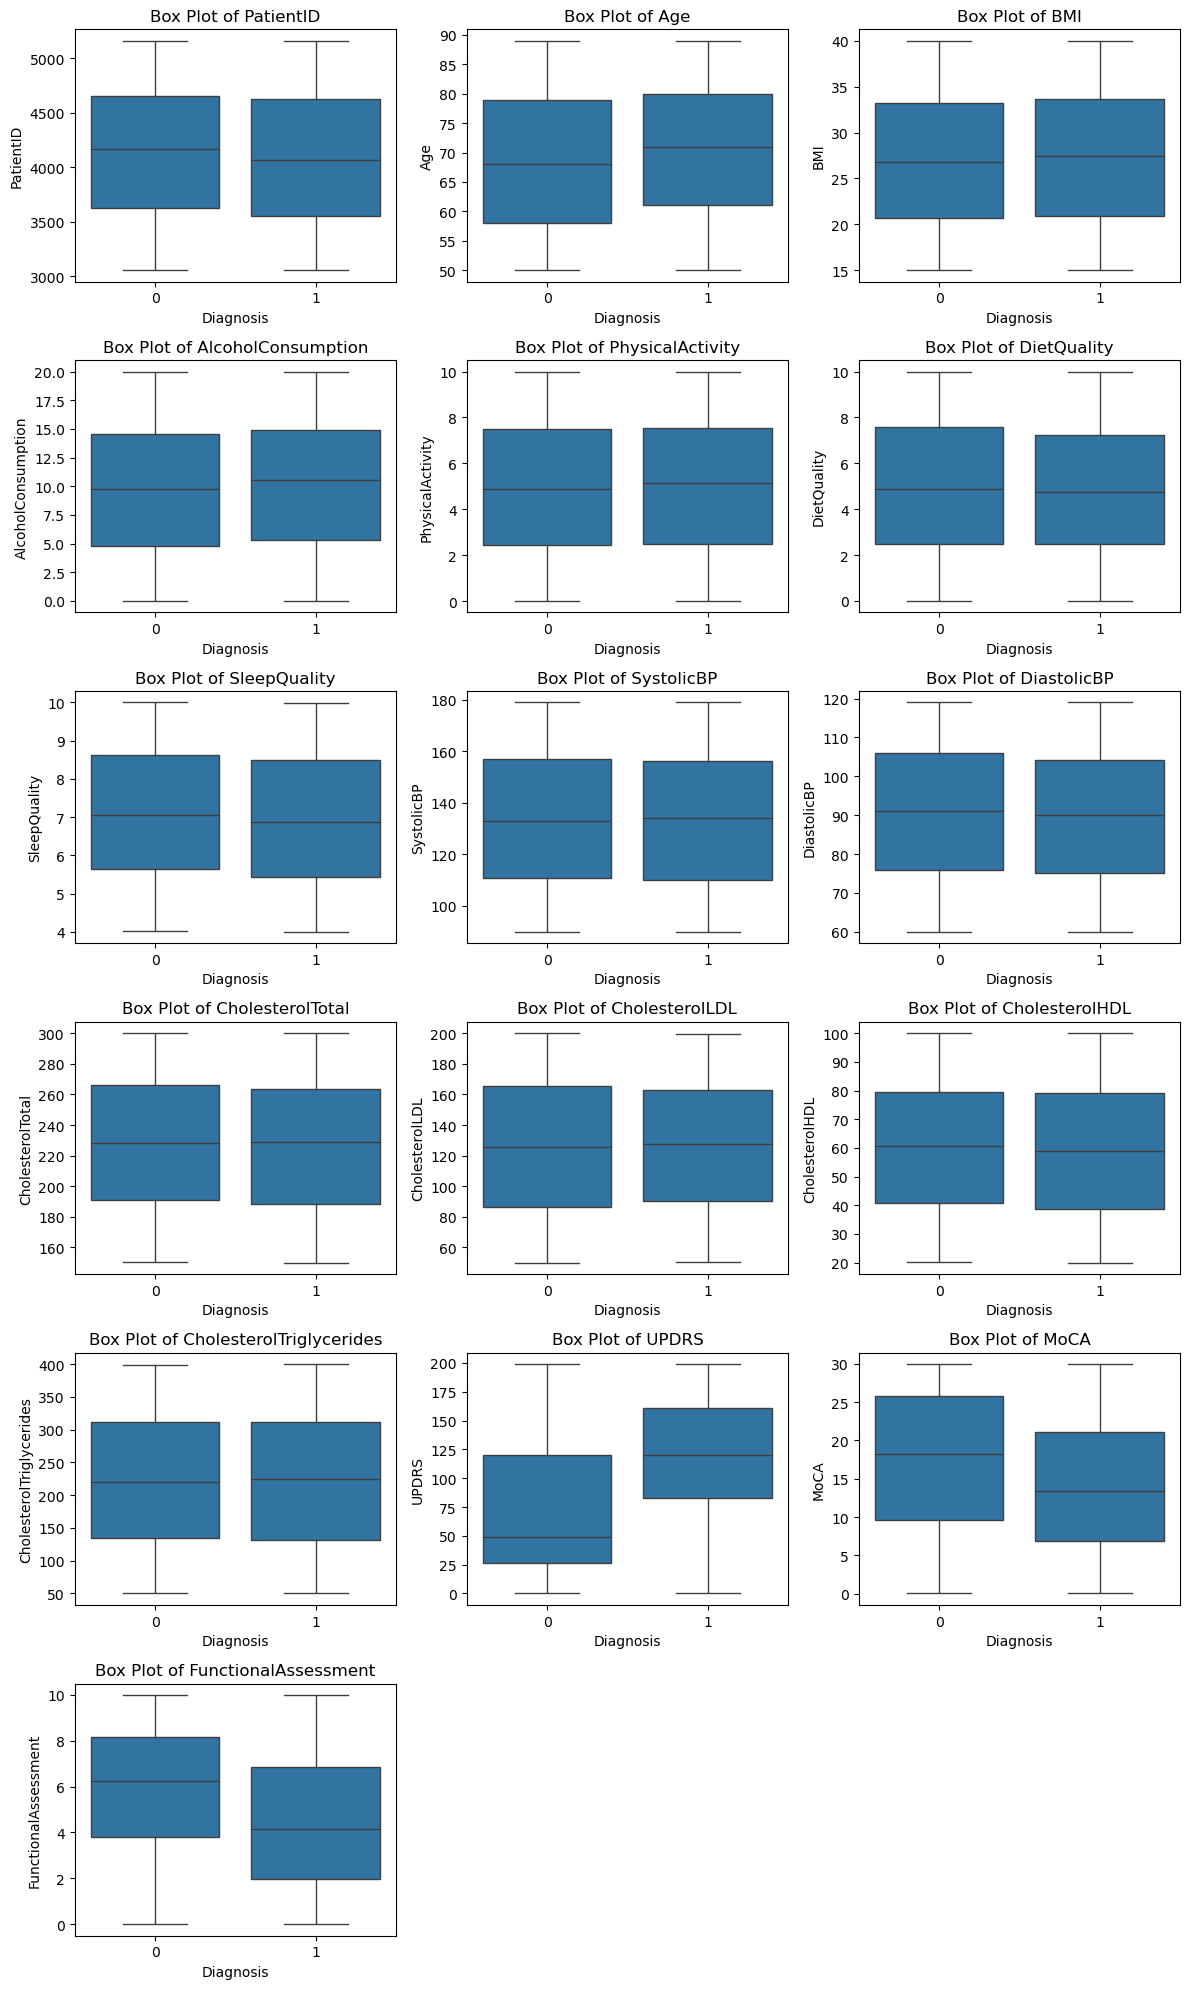

In [14]:
#  Show a box plot of continous variables with and without a parkinsons diagnosis.
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns) 
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    # df_count = df_continuous.groupby('Diagnosis').agg({col: 'count'}).reset_index()
    sns.boxplot(x='Diagnosis', y=col, data=df_continuous, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)

    
axs[-2].set_visible(False)
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [15]:
pd.option_context('mode.use_inf_as_na', True)

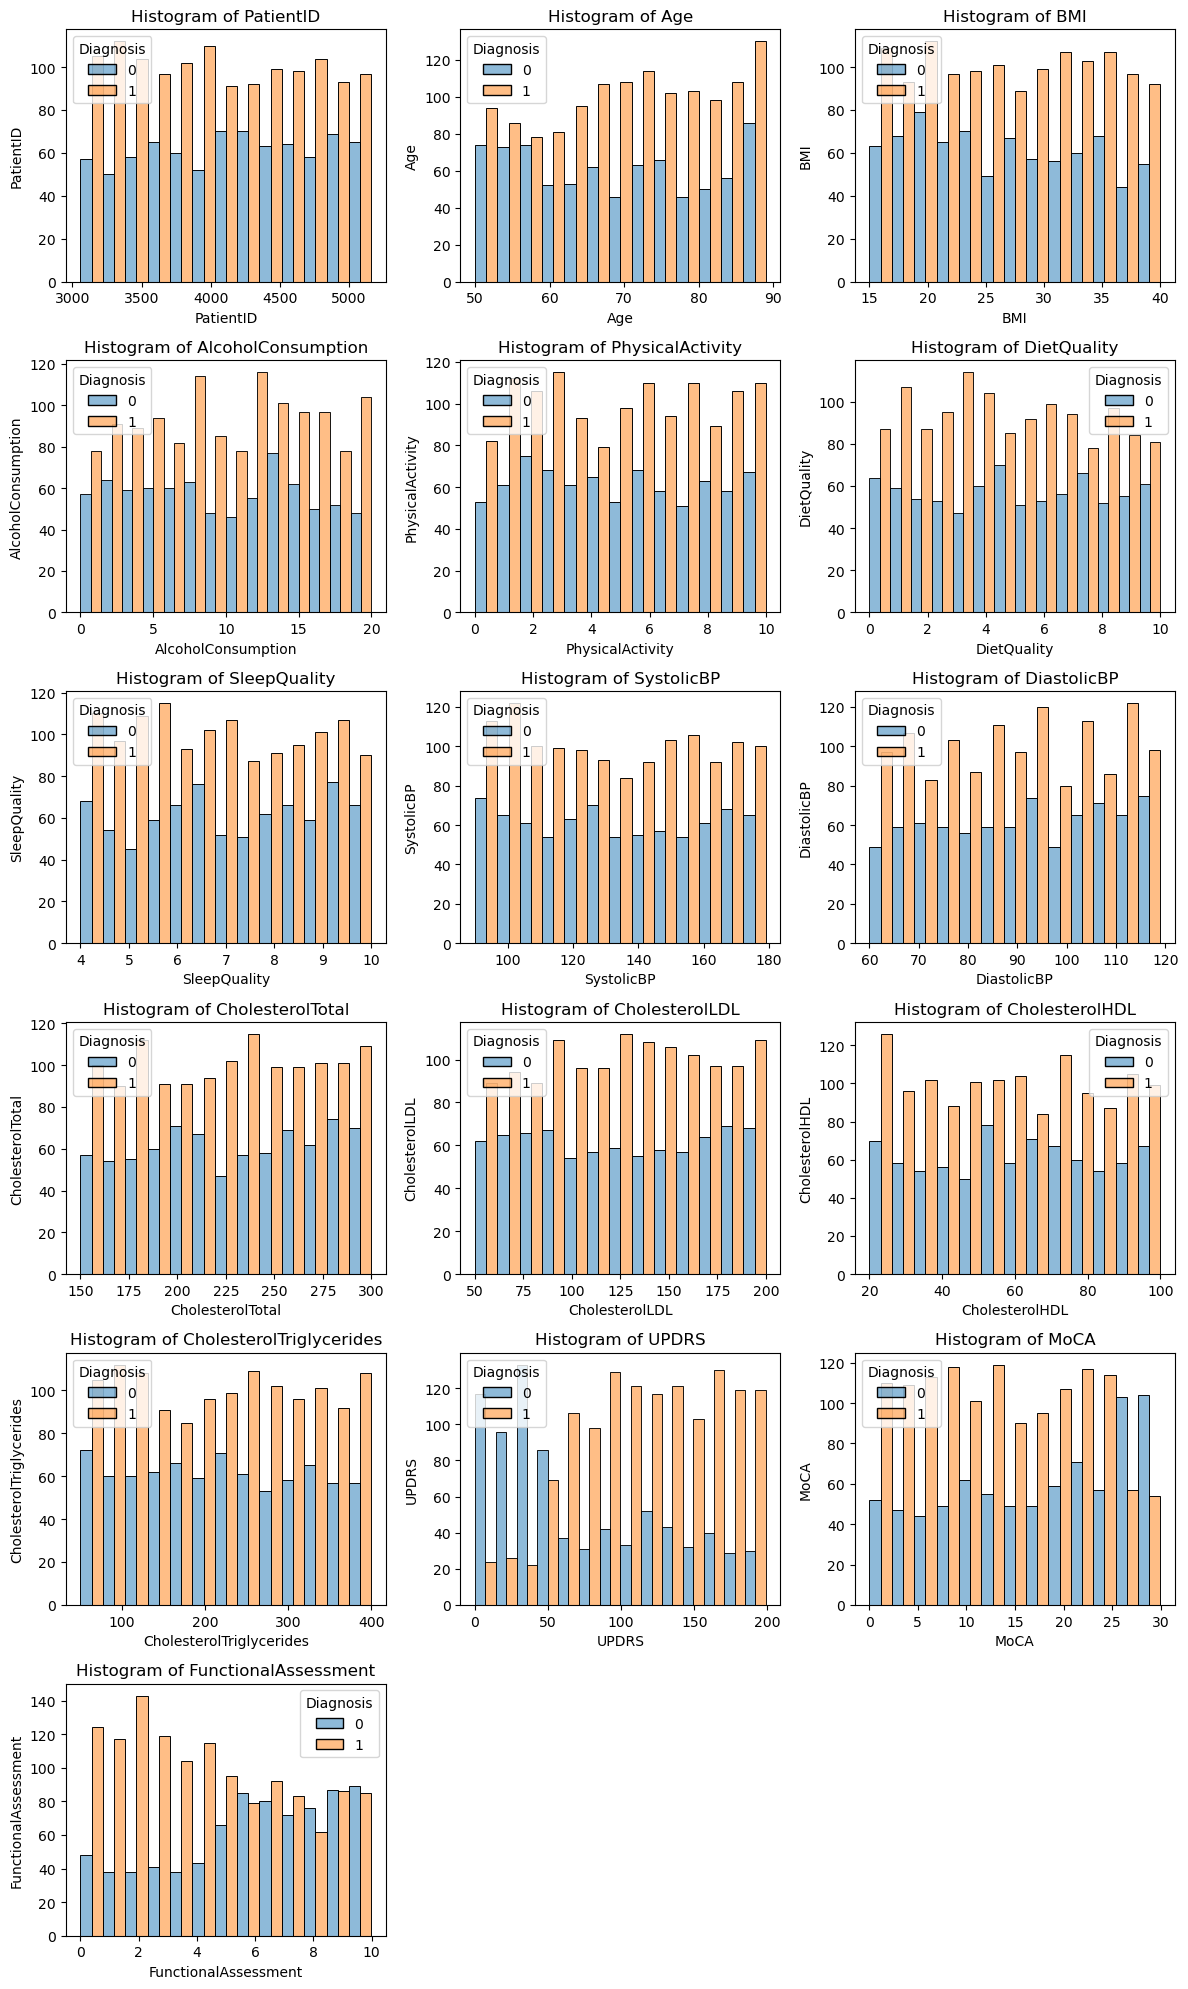

In [16]:
#  Create a histogram of each feature categorized by diagnosis
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns) 
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    sns.histplot(x=col, hue='Diagnosis',  data=df, ax=axs[i], multiple='dodge', alpha=0.5)
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_ylabel(col)
axs[-2].set_visible(False)
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

####  The following variables seem to show a clear correlation with a Parkinsons Diagnosis:
-  UPDRS:  Unified Parkinsons Disease Rating Scale
-  MCoA:  Montreal Cognitive Assessment
-  Functional Assessment
-  Check the correlation and p_values for these variables

### Evaluating Correlation between feature and target variables.
-  Point Biserial Correlation:
    - Special case of the pearson correlation that measures the relationship between continuous variable and a binary target variable.
    - It assesses how the mean of a numberical variable differs across the two categories of a binary variable. 

In [17]:
#  For continous variables, what is the correlation to parkinsons?  For this, we will use the 
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cont_columns:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df[col], df[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
13,UPDRS,Positive_Diagnosis,0.3980,7.6427e-81
15,FunctionalAssessment,Positive_Diagnosis,-0.2250,1.4207e-25
14,MoCA,Positive_Diagnosis,-0.1731,1.2668e-15
1,Age,Positive_Diagnosis,0.0653,2.7049e-03
0,PatientID,Positive_Diagnosis,-0.0435,4.5943e-02
6,SleepQuality,Positive_Diagnosis,-0.0433,4.7016e-02
3,AlcoholConsumption,Positive_Diagnosis,0.0367,9.2313e-02
2,BMI,Positive_Diagnosis,0.0301,1.6724e-01
8,DiastolicBP,Positive_Diagnosis,-0.0291,1.8239e-01
5,DietQuality,Positive_Diagnosis,-0.0230,2.9170e-01


In [18]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01) 
df_corr_p_val[filter]
corr_cols = list(df_corr_p_val[filter].x_variable)
corr_cols

['UPDRS', 'FunctionalAssessment', 'MoCA']

6 3


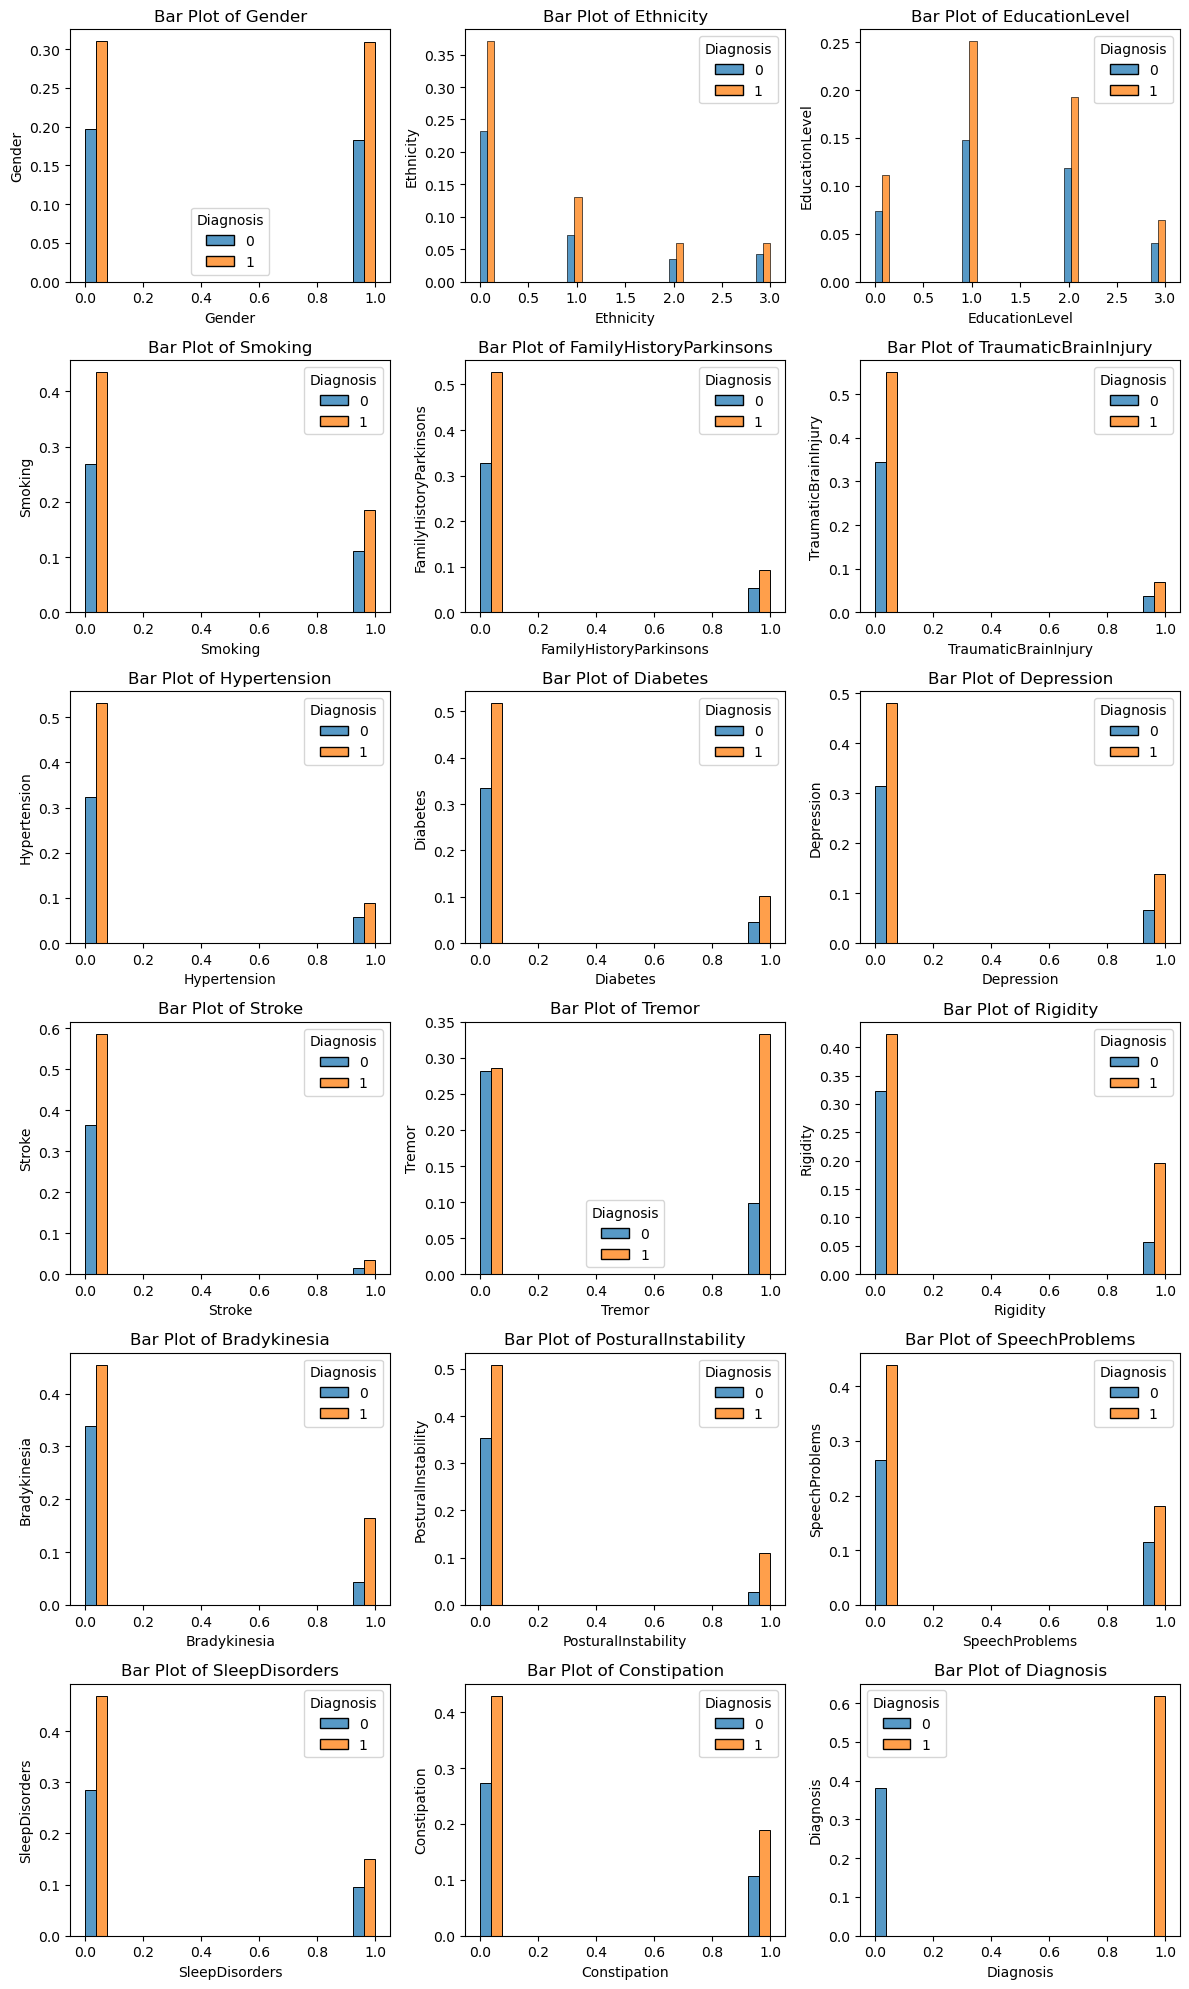

In [19]:
#  Box plot of variables
plot_columns = 3
plot_rows = math.ceil(len(cat_columns) / plot_columns) 
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cat_columns):
    sns.histplot(x=col, hue='Diagnosis', stat='proportion', multiple='dodge', data=df, ax=axs[i])
    axs[i].set_title(f'Bar Plot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## 5.  Feature Engineering

###  Testing Feature Sets and New Features, Transforming Features
-  Test Baseline Set of Features (All features except 'Doctors in Charge', test model scores.
-  Normalize continuous columns and test model scores.
-  Normalize continuous columns and OH encode categorical columns.
-  Evaluate subset of columns 'corr_cols' and test model scores.

In [20]:
#  Function to score accuracy of models
def evaluate_models(X, y, feature_case, cv=5):
    """
    Function to evaluate 5 different models and return cross-validation results.
    
    Parameters:
    X: pd.DataFrame or np.array, Features
    y: pd.Series or np.array, Target binary variable
    cv: int, number of cross-validation folds (default=5)
    
    Returns:
    pd.DataFrame with mean cross-validation scores for each model
    """
    scaler = StandardScaler()
    X = X.copy()
    
    X_scaled = scaler.fit_transform(X)
       
    # Define models to test
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'SVM': SVC(probability=True),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }
    
    # Dictionary to store results
    results = {}
    
    # Loop over models and calculate cross-validation score
    for name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')  # You can use other metrics like 'roc_auc', 'f1', etc.
        results[name] = scores.mean()

    
    # Convert the results to a DataFrame for easy comparison
    results_df = pd.DataFrame(results.items(), columns=['Model', 'Mean CV Accuracy'])
    results_df['Feature_set_case'] = feature_case
    
    return results_df

### Evaluating Correlation between Feature and Target Variables.
-  Point Bi-Serial Correlation:
    - Special case of the pearson correlation that measures the relationship between a continous variable and a binary target variable.
    - Assesses how the mean of a numerical variable differs across the two categories of the binary variable.
-  Measuring Collinearity between Feature Variables:
    - Evaluate the correlation between feature variables.
    - Flag correlation above a threshold.
-  Test model accuracy for each adjustment to feature variables to see any changes.

In [21]:
#  For categorical variables, what is the correlation to parkinsons?  For this, we will use the 
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cat_columns[:-1]:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df[col], df[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val



,x_variable,y_variable,correlation_coef,p_value
10,Tremor,Positive_Diagnosis,0.2744,1.1482e-37
11,Rigidity,Positive_Diagnosis,0.1856,9.0407e-18
12,Bradykinesia,Positive_Diagnosis,0.1840,1.7143e-17
13,PosturalInstability,Positive_Diagnosis,0.1475,1.0357e-11
8,Depression,Positive_Diagnosis,0.0591,6.7003e-03
7,Diabetes,Positive_Diagnosis,0.0571,8.8235e-03
9,Stroke,Positive_Diagnosis,0.0281,1.9760e-01
16,Constipation,Positive_Diagnosis,0.0253,2.4543e-01
5,TraumaticBrainInjury,Positive_Diagnosis,0.0230,2.9230e-01
0,Gender,Positive_Diagnosis,0.0168,4.4012e-01


In [22]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01) 
df_corr_p_val[filter]
corr_colsb = list(df_corr_p_val[filter].x_variable)
corr_colsb

['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']

In [23]:
corr_cols.extend(corr_colsb)
corr_cols

['UPDRS',
 'FunctionalAssessment',
 'MoCA',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability']

####  Baseline Model Scores on Full Dataset

In [24]:
df_model_scores = pd.DataFrame()
X = df.iloc[:,1:-1].copy()
y = X.pop('Diagnosis')

baseline = evaluate_models(X,y, 'Baseline Case')
df_model_scores = pd.concat([df_model_scores, baseline])
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.8114,Baseline Case
1,Random Forest,0.9178,Baseline Case
2,Gradient Boosting,0.9321,Baseline Case
3,SVM,0.8252,Baseline Case
4,K-Nearest Neighbors,0.7249,Baseline Case


#### Normalize Continous Features and re-run model.

In [25]:

df_cont_scaled = (df[cont_columns[1::]] - df[cont_columns[1::]].mean())/df[cont_columns[1::]].std()
df_merged = pd.merge(df_cont_scaled, df[cat_columns], left_index=True, right_index=True)
df_merged

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,...,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,1.3281,-1.0529,-0.8673,-1.2577,-0.3548,1.3043,-0.1781,-1.7730,-0.0922,0.5063,...,0,0,1,0,0,0,0,0,0,0
1,0.4656,-1.5208,-0.7056,1.1737,1.2536,-0.7953,1.1048,-0.8352,-0.3753,0.6360,...,0,0,0,1,0,1,0,1,0,1
2,0.0343,-1.6428,-1.3712,-1.6615,0.5522,1.6732,-0.7818,0.1612,1.3886,-0.1715,...,0,0,1,0,0,0,1,0,1,1
3,-1.5181,-1.6308,-0.7109,-1.2597,0.6275,-1.5975,0.4634,-0.7180,1.2269,0.2339,...,0,0,1,1,1,0,0,0,1,1
4,1.5005,-1.1922,-0.0466,-1.3242,-0.0889,1.3504,-0.7063,0.2198,1.3112,-0.4077,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,1.5005,1.5641,0.4632,0.1070,0.3601,-0.3995,-1.5742,0.4542,-0.8141,-0.6316,...,0,0,1,0,0,0,1,1,0,0
2101,-0.2244,0.8997,-1.5937,-1.6978,-0.0305,-0.3732,-1.1591,0.3370,-1.7590,-0.3245,...,0,0,0,0,0,1,0,1,1,1
2102,-0.3969,-0.6076,-0.6837,0.2623,-1.5942,1.5649,1.2935,-0.6594,-1.5488,-1.4883,...,0,1,0,0,0,0,1,1,0,1
2103,-0.7419,-1.4343,-1.7141,-0.9465,1.6314,0.7374,-0.1781,0.3956,0.1234,-1.6845,...,0,0,1,0,1,0,0,1,1,1


In [26]:
#  Assign X and y and calculate model scores.
X_1 = df_merged.copy()
y = X_1.pop('Diagnosis')
normalize_cont = evaluate_models(X_1,y, 'Normalize Continuous Variables')
df_model_scores = pd.concat([df_model_scores, normalize_cont]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.8114,Baseline Case
1,Random Forest,0.9178,Baseline Case
2,Gradient Boosting,0.9321,Baseline Case
3,SVM,0.8252,Baseline Case
4,K-Nearest Neighbors,0.7249,Baseline Case
5,Logistic Regression,0.8114,Normalize Continuous Variables
6,Random Forest,0.9188,Normalize Continuous Variables
7,Gradient Boosting,0.9325,Normalize Continuous Variables
8,SVM,0.8252,Normalize Continuous Variables
9,K-Nearest Neighbors,0.7249,Normalize Continuous Variables


####  Normalizing the continuous varaibles did not improve the accuracy of the model.
####  Next:
-  Try One Hot Encoding the categorical variables.

In [27]:
#  OH encode columns of the dataframe.
cat_columns[:-1]
X_2 = df.iloc[:,1:-1].copy()
y = X_2.pop('Diagnosis')
X_encoded = pd.get_dummies(X_2, columns=cat_columns[:-1])
OH_encoded = evaluate_models(X_encoded,y, 'One Hot Encode Categorical')
df_model_scores = pd.concat([df_model_scores, OH_encoded]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.8114,Baseline Case
1,Random Forest,0.9178,Baseline Case
2,Gradient Boosting,0.9321,Baseline Case
3,SVM,0.8252,Baseline Case
4,K-Nearest Neighbors,0.7249,Baseline Case
5,Logistic Regression,0.8114,Normalize Continuous Variables
6,Random Forest,0.9188,Normalize Continuous Variables
7,Gradient Boosting,0.9325,Normalize Continuous Variables
8,SVM,0.8252,Normalize Continuous Variables
9,K-Nearest Neighbors,0.7249,Normalize Continuous Variables


####  One Hot Encoding the Categorical Variables did not appear to improve model performance.
#### Next:
-  Try a more condensed set of feature variables which has a strong corrrelation with the target.

In [28]:
# Run model performance only with columns with high correlation.
X3 = df[corr_cols].copy()
y = df['Diagnosis'].copy()
df_model_corr_cols = evaluate_models(X3,y, 'Use Featues with High Correlation')
df_model_scores = pd.concat([df_model_scores, df_model_corr_cols]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.8114,Baseline Case
1,Random Forest,0.9178,Baseline Case
2,Gradient Boosting,0.9321,Baseline Case
3,SVM,0.8252,Baseline Case
4,K-Nearest Neighbors,0.7249,Baseline Case
5,Logistic Regression,0.8114,Normalize Continuous Variables
6,Random Forest,0.9188,Normalize Continuous Variables
7,Gradient Boosting,0.9325,Normalize Continuous Variables
8,SVM,0.8252,Normalize Continuous Variables
9,K-Nearest Neighbors,0.7249,Normalize Continuous Variables


####  The subset of features with high correlation improved the accuracy of Random Forest, Gradient Boosting, SVM and KNN.
#### Next Step:
-  OH encode the categorical columns of the smaller feature set.

In [29]:
columns_to_encode = df[corr_cols].columns[3::]
df_encoded = pd.get_dummies(df[corr_cols], columns=columns_to_encode)
X3_encoded = df_encoded.copy()
y = df['Diagnosis'].copy()
df_OH_corr_cols = evaluate_models(X3_encoded,y, 'Featues with High Corr. and OH encoding')
df_model_scores = pd.concat([df_model_scores, df_OH_corr_cols]).reset_index(drop=True)
df_model_scores

,Model,Mean CV Accuracy,Feature_set_case
0,Logistic Regression,0.8114,Baseline Case
1,Random Forest,0.9178,Baseline Case
2,Gradient Boosting,0.9321,Baseline Case
3,SVM,0.8252,Baseline Case
4,K-Nearest Neighbors,0.7249,Baseline Case
5,Logistic Regression,0.8114,Normalize Continuous Variables
6,Random Forest,0.9188,Normalize Continuous Variables
7,Gradient Boosting,0.9325,Normalize Continuous Variables
8,SVM,0.8252,Normalize Continuous Variables
9,K-Nearest Neighbors,0.7249,Normalize Continuous Variables


In [30]:
df_model_scores.sort_values('Mean CV Accuracy', ascending=False)

,Model,Mean CV Accuracy,Feature_set_case
16,Random Forest,0.9344,Use Featues with High Correlation
22,Gradient Boosting,0.9335,Featues with High Corr. and OH encoding
17,Gradient Boosting,0.9335,Use Featues with High Correlation
21,Random Forest,0.9325,Featues with High Corr. and OH encoding
7,Gradient Boosting,0.9325,Normalize Continuous Variables
2,Gradient Boosting,0.9321,Baseline Case
12,Gradient Boosting,0.9316,One Hot Encode Categorical
11,Random Forest,0.9207,One Hot Encode Categorical
6,Random Forest,0.9188,Normalize Continuous Variables
1,Random Forest,0.9178,Baseline Case


####  The Gradient Boosting and Random Forest Models produces the best accuracy scores with the feature set with high correlation.
####  Next Step:
-  Further tune each model with GridSearch and see if we can get better accuracy scores.

## 6. Modeling and Evaluation

###  Fine Tune the Gradient Boosting and Ramdom Forest Classification Models using GridSearch

In [31]:
#  plot a confusion matrix when given the actual y_test and Y_predicted
def plot_confusion_matrix(y_test, y_predict):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predict)
    #  plot confusion matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # Step 3: Add labels, title, and axis names
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Step 4: Show the plot
    plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.9394305496679383
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       150
           1       0.96      0.91      0.93       271

    accuracy                           0.92       421
   macro avg       0.91      0.92      0.91       421
weighted avg       0.92      0.92      0.92       421



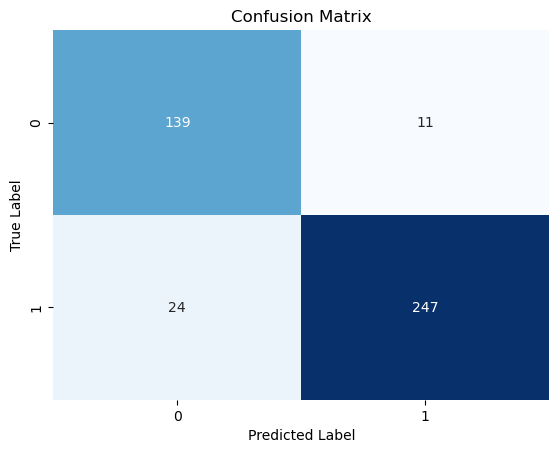

In [32]:
#  Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]        # Minimum number of samples required to split a node
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model, 
    param_grid=param_grid, 
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Metric to evaluate
    n_jobs=-1,               # Use all available cores
    verbose=1                # Print progress during fitting
)

# Fit GridSearch to data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model with classification report
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9251854599406528
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       150
           1       0.95      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421



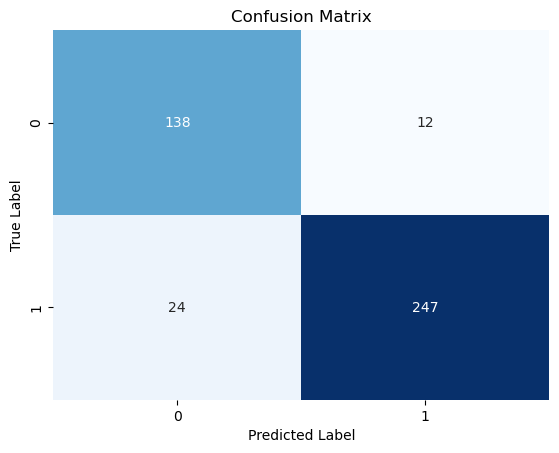

In [33]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Metric to evaluate
    n_jobs=-1,               # Use all available cores
    verbose=1                # Print progress during fitting
)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model with a classification report
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

## 7. Findings and Conclusions

-  Parkinsons clinical data and analysis results were analyzed for NaN values, dupliates and outliers.
-  Outliers were left in the data since they could contribute to the model.
-  Feature variables were evaluated for biserial correlation with target variables.
-  Different sets of feature variables were tested against the target; Parkinsons Disease Diagnosis target variable.
-  The feature set which produced the best results was the smaller feature set which correlated most with the Diagnosis variable.  OH encoding did not improve the model accuracy scoring.
-  The final model produced an accuracy of 91% with Random Forest and 91% with Gradient Boosting.
    -  Precision of a positive PD diagnosis was 95% with a recall of 91% for the Gradient Boosting Classification Model.
    -  Precision of a positive PD diagnosis was 96% with a recall of 90% for the Random Forest Classification Model.
-  Because the Gradient Boosting model produced higher recall of 91%, the model produces less false negatives than the Random Forest model with a recall of 90%.  
-  The higher precision of the Random Forest model produces more actual positive PD diagnosis relative to all positive PD predictions.  This is helpful so that patients are not unnecessarily given treatment for PD.  
-  This is a tradeoff.  I understand that one of the tools used for diagnosis is to test whether a patient diagnosed with PD, responds to treatment for PD.  Therefore, there is a secondary means of diagnosis that could be employed to limit the number of false positives that recieve long term treatment if in the short term treatment does not cause a reduction in symptoms.  In this case, I would assume that the Gradient Boosting Classification Model with the higher recall (lower false negative rate) would be more useful because the cost of a false positive would be temporary.
